## **Section 1: Data Preparation**

### 1.1: Import and Describe Data

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
df = pd.read_csv('/content/drive/MyDrive/purchase_credit_card.csv')

In [74]:
df.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


In [75]:
print(df.shape)
print(df.columns)
df.describe()

(442458, 11)
Index(['Year-Month', 'Agency Number', 'Agency Name', 'Cardholder Last Name',
       'Cardholder First Initial', 'Description', 'Amount', 'Vendor',
       'Transaction Date', 'Posted Date', 'Merchant Category Code (MCC)'],
      dtype='object')


,Year-Month,Agency Number,Amount
count,442458.000000,442458.000000,4.424580e+05
mean,201357.284375,42785.860353,4.249912e+02
std,47.107417,33378.461293,5.266509e+03
min,201307.000000,1000.000000,-4.286304e+04
25%,201309.000000,1000.000000,3.091000e+01
50%,201401.000000,47700.000000,1.048900e+02
75%,201404.000000,76000.000000,3.450000e+02
max,201406.000000,98000.000000,1.903858e+06


### 1.2: Clean Column Names

In [76]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('merchant_category_code_(mcc)', 'mcc')
print(df.columns)

Index(['year_month', 'agency_number', 'agency_name', 'cardholder_last_name',
       'cardholder_first_initial', 'description', 'amount', 'vendor',
       'transaction_date', 'posted_date', 'mcc'],
      dtype='object')


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442458 entries, 0 to 442457
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   year_month                442458 non-null  int64  
 1   agency_number             442458 non-null  int64  
 2   agency_name               442458 non-null  object 
 3   cardholder_last_name      442458 non-null  object 
 4   cardholder_first_initial  442458 non-null  object 
 5   description               442458 non-null  object 
 6   amount                    442458 non-null  float64
 7   vendor                    442458 non-null  object 
 8   transaction_date          442458 non-null  object 
 9   posted_date               442458 non-null  object 
 10  mcc                       442458 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 37.1+ MB


### 1.3: Date Fields

In [78]:
#turn transaction_date, posted_date, year_month into date fields
df.transaction_date = pd.to_datetime(df.transaction_date)
df.posted_date = pd.to_datetime(df.posted_date)
df.year_month = pd.to_datetime(df['year_month'], format='%Y%m')

/tmp/ipython-input-4115857710.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.transaction_date = pd.to_datetime(df.transaction_date)
/tmp/ipython-input-4115857710.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.posted_date = pd.to_datetime(df.posted_date)


## **Section 2: Data Observations**

### 2.1: Organize by agency with bar plots


*   Plot agency_name in relation to its counts to see the most popular credit card agency
*   Plot agency_name in relation to amount of money spent to see which agency has the largest amount spent



/tmp/ipython-input-2377846255.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = agency_counts.index, x = agency_counts.values, palette = 'flare', ax = axes[0])
/tmp/ipython-input-2377846255.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = agency_counts.index, x = agency_total_amount.values, palette = 'viridis', ax = axes[1])


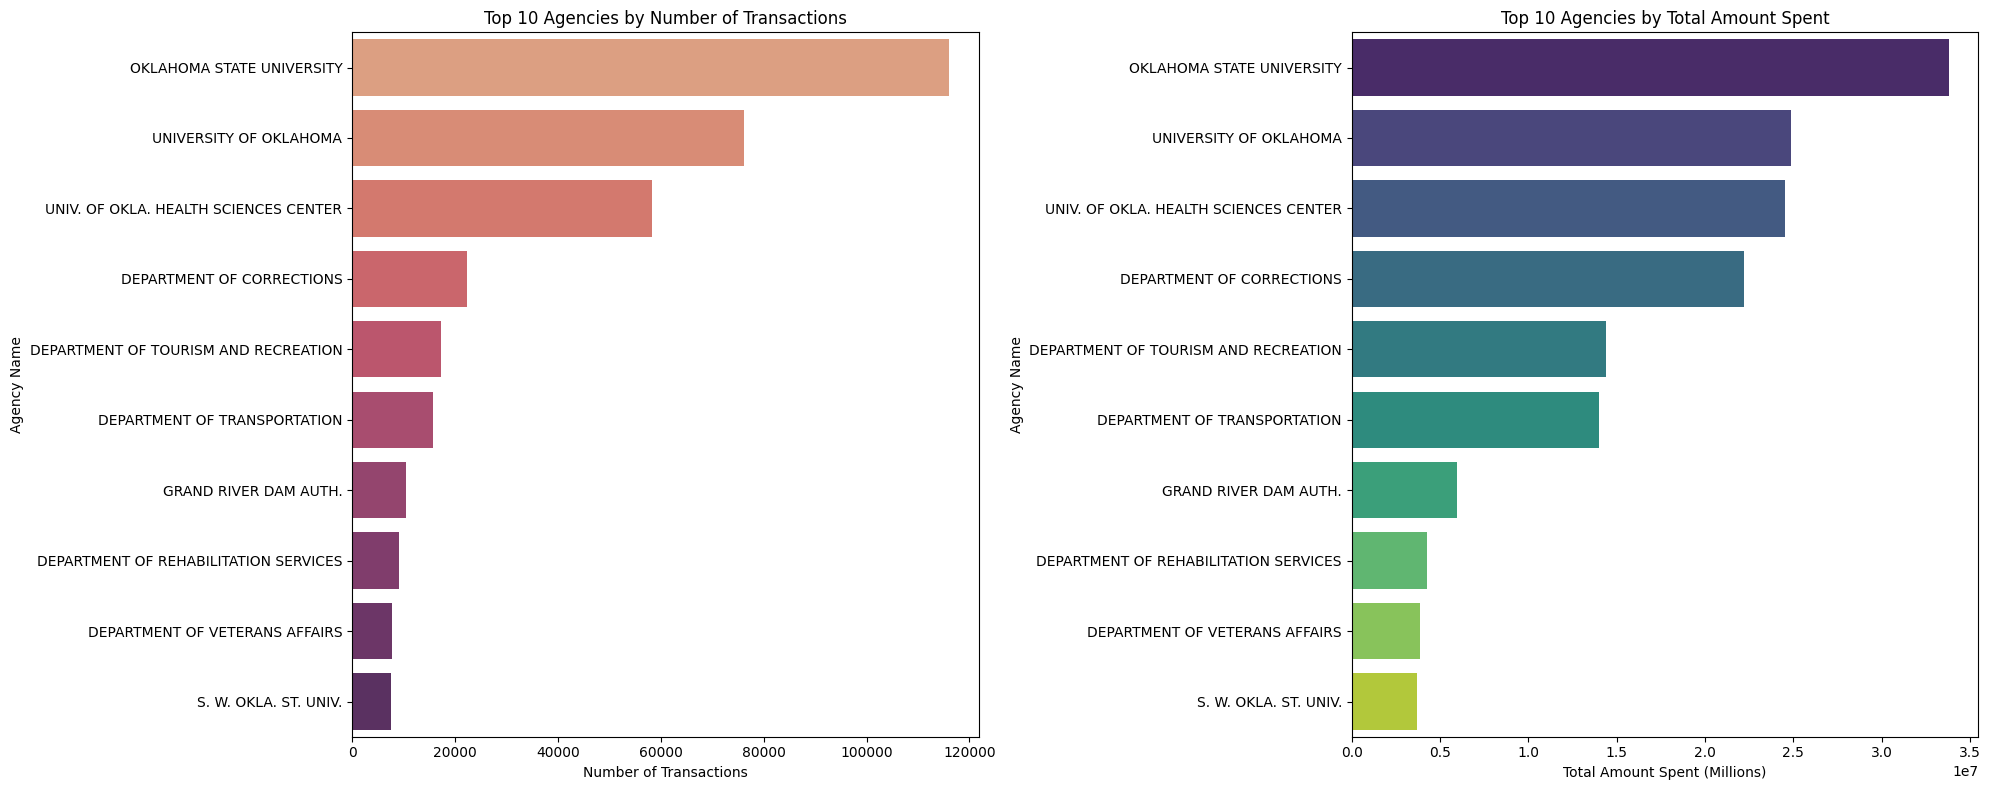

In [79]:
# Side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot agency_name in relation to its counts to see the most popular credit card agency
agency_counts = df['agency_name'].value_counts().sort_values(ascending=False).head(10)

sns.barplot(y = agency_counts.index, x = agency_counts.values, palette = 'flare', ax = axes[0])
axes[0].set_title('Top 10 Agencies by Number of Transactions')
axes[0].set_xlabel('Number of Transactions')
axes[0].set_ylabel('Agency Name')

# Group by agency_name and sum the 'amount' to find total spending per agency
agency_total_amount = df.groupby('agency_name')['amount'].sum().sort_values(ascending=False).head(10)

# Create the bar plot
sns.barplot(y = agency_counts.index, x = agency_total_amount.values, palette = 'viridis', ax = axes[1])
axes[1].set_title('Top 10 Agencies by Total Amount Spent')
axes[1].set_xlabel('Total Amount Spent (Millions)')
axes[1].set_ylabel('Agency Name')

plt.tight_layout()
plt.show()

Observation: Oklahoma State University seems to be the most popular agency and with the most money spent.

### 2.2: Organize by vendor


/tmp/ipython-input-4238533581.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = vendor_counts.index, x = vendor_counts.values, palette = "rocket", ax=axes[0])
/tmp/ipython-input-4238533581.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-4238533581.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = vendor_counts.index, x = vendor_total_amount.values, palette = "crest", ax=axes[1])
/tmp/ipython-input-4238533581.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e

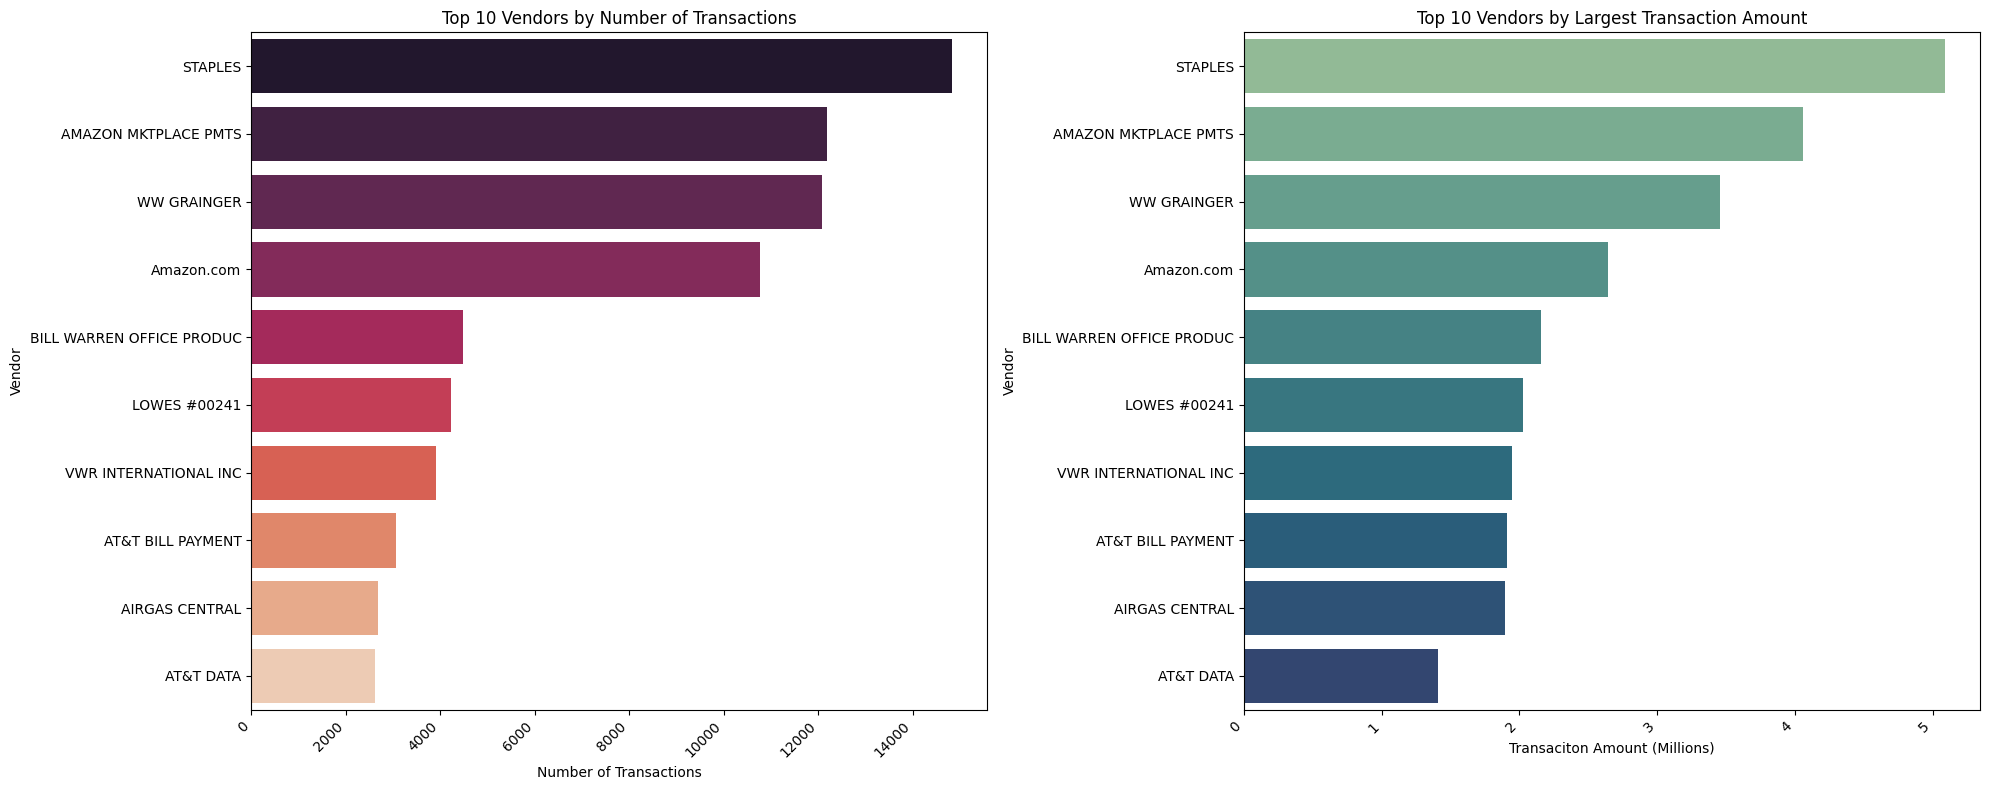

In [80]:
# Make side-by-side plots ordered by number of transactions and largest amount spent

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

vendor_counts = df['vendor'].value_counts().sort_values(ascending = False).head(10)

sns.barplot(y = vendor_counts.index, x = vendor_counts.values, palette = "rocket", ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_title('Top 10 Vendors by Number of Transactions')
axes[0].set_xlabel('Number of Transactions')
axes[0].set_ylabel('Vendor')

vendor_total_amount = df.groupby('vendor')['amount'].sum().sort_values(ascending=False).head(10)

sns.barplot(y = vendor_counts.index, x = vendor_total_amount.values, palette = "crest", ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_title('Top 10 Vendors by Largest Transaction Amount')
axes[1].set_xlabel('Transaciton Amount (Millions)')
axes[1].set_ylabel('Vendor')

plt.tight_layout()
plt.show()

### 2.2.1: Single-Occurance Vendors
Staples and Amazon seem to be among the most popular vendors customers choose to buy from. However, can we find the vendors where only one transaction occured?

In [81]:
vendors_all_counts = df['vendor'].value_counts()
single_occurrence_vendors = vendors_all_counts[vendors_all_counts == 1]
print(f"There are {len(single_occurrence_vendors)} single occurance vendors.")

There are 65049 single occurance vendors.


Single occurance vendors means a customer only bought from that vendor once. Since the customer is not a regular at this vendor, this raises the question: could a single-occurance transaction with a large amount of money be a case of fraud?

In [82]:
# Identify vendors that appear only once
vendors_all_counts = df['vendor'].value_counts()
single_occurrence_vendors_list = vendors_all_counts[vendors_all_counts == 1].index.tolist()

# Create a new DataFrame containing transactions only from these single-occurrence vendors
df_single_occurrence_vendors = df[df['vendor'].isin(single_occurrence_vendors_list)]

display(df_single_occurrence_vendors.head())

,year_month,agency_number,agency_name,cardholder_last_name,cardholder_first_initial,description,amount,vendor,transaction_date,posted_date,mcc
55,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,M,GENERAL PURCHASE,99.99,SPORTSMANS WAREHOUSE 145,2013-07-24,2013-07-26,SPORTING GOODS STORES
71,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Eharis,K,Educational Services EA,5.00,CLOUD COUNTY COMM COLLEGE,2013-07-25,2013-07-26,"COLLEGES,UNIVERSITIES,PROFESSIONAL SCHLS AND J..."
74,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Ferrari,D,GENERAL PURCHASE,136.00,INVITROGEN 23381202,2013-07-25,2013-07-26,CATALOG MERCHANTS
97,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gross,M,GENERAL PURCHASE,15.14,FACEBK MZPXH4AKR2,2013-07-27,2013-07-29,ADVERTISING SERVICES
101,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,HANNON,B,GENERAL PURCHASE,573.52,STORM COPPER COMPONENTS,2013-07-26,2013-07-29,METAL SERVICE CENTERS AND OFFICES


In [83]:
# Filter by only transaction_date, amount, description, and vendor
df_single_occurrence_vendors_filtered = df_single_occurrence_vendors[['amount', 'mcc', 'vendor']]

print("Filtered DataFrame for single-occurrence vendors:")
display(df_single_occurrence_vendors_filtered.head())

Filtered DataFrame for single-occurrence vendors:


,amount,mcc,vendor
55,99.99,SPORTING GOODS STORES,SPORTSMANS WAREHOUSE 145
71,5.00,"COLLEGES,UNIVERSITIES,PROFESSIONAL SCHLS AND J...",CLOUD COUNTY COMM COLLEGE
74,136.00,CATALOG MERCHANTS,INVITROGEN 23381202
97,15.14,ADVERTISING SERVICES,FACEBK MZPXH4AKR2
101,573.52,METAL SERVICE CENTERS AND OFFICES,STORM COPPER COMPONENTS


In [84]:
top_15_sov = df_single_occurrence_vendors_filtered.sort_values(by='amount', ascending=False).head(15)

# Check if a string contains numbers
def contains_numbers(s):
    return any(char.isdigit() for char in str(s))

# Remove 'NOT ELSEWHERE CLASSIFIED'
top_15_sov['mcc'] = top_15_sov['mcc'].apply(lambda x: str(x).upper().replace('NOT ELSEWHERE CLASSIFIED', '').strip() if 'NOT ELSEWHERE CLASSIFIED' in str(x).upper() else x)

print(top_15_sov)

           amount                                                mcc  \
252286  149500.00                              COMMERCIAL EQUIPMENT,   
81766    75393.94                                INDUSTRIAL SUPPLIES   
219569   65882.75                                  CATALOG MERCHANTS   
229590   63959.00  DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...   
441165   57835.05                  MISCELLANEOUS PERSONAL SERVICES--   
214404   54055.33                  DIRCT MARKETING/DIRCT MARKETERS--   
366583   49529.00          MISCELLANEOUS AND SPECIALTY RETAIL STORES   
441602   45966.00                                INDUSTRIAL SUPPLIES   
251310   45960.00                                     DURABLE GOODS,   
441749   45784.64     GENERAL CONTRACTORS-RESIDENTIAL AND COMMERCIAL   
222125   41940.00  DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...   
176154   41282.51                              COMMERCIAL EQUIPMENT,   
111123   40680.00                  MISCELLANEOUS GENERAL MERCHAN

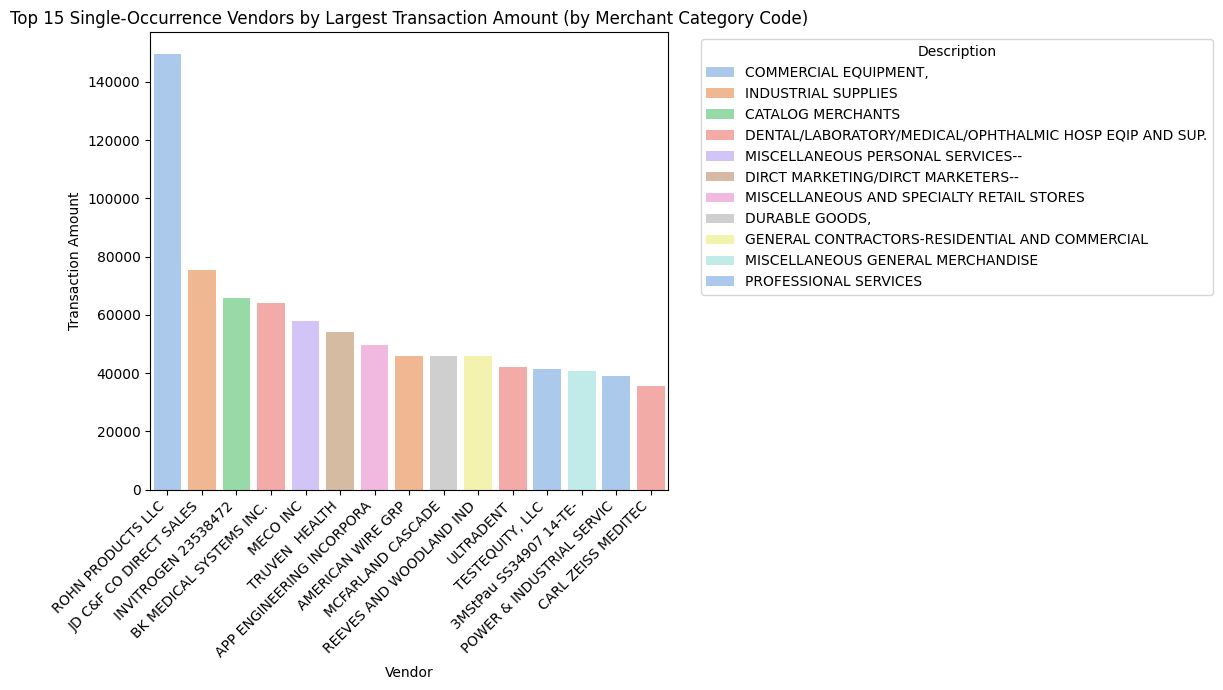

In [85]:
# Sort single-occurrence vendors by amount in descending order and take the top 15
plt.figure(figsize=(12, 7))
sns.barplot(x='vendor', y='amount', data=top_15_sov, hue='mcc', palette='pastel', dodge=False)
plt.xticks(rotation=45, ha='right')
plt.title('Top 15 Single-Occurrence Vendors by Largest Transaction Amount (by Merchant Category Code)')
plt.xlabel('Vendor')
plt.ylabel('Transaction Amount')
plt.legend(title='Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 2.3: Concentrated Study - Casinos
Another place of potential fraud can be at casinos , which we can look at more closely with another graph.

In [86]:
casinos = df[df['vendor'].str.contains('CASINO', na=False)]
casinos_filtered = casinos[['amount', 'mcc', 'vendor', 'year_month']]
print(casinos_filtered)

         amount                                 mcc                    vendor  \
1495    -364.00                                ARIA      ARIA RESORT & CASINO   
1620    -364.00                                ARIA      ARIA RESORT & CASINO   
2661    1031.52                                ARIA      ARIA RESORT & CASINO   
2662    1031.52                                ARIA      ARIA RESORT & CASINO   
11809   1342.25  LODGING--HOTELS,MOTELS,AND RESORTS    SO PT HOTEL AND CASINO   
...         ...                                 ...                       ...   
438423    83.00             MICROTEL INN AND SUITES     ARTESIAN HOTEL CASINO   
438425    83.00             MICROTEL INN AND SUITES     ARTESIAN HOTEL CASINO   
438428    83.00             MICROTEL INN AND SUITES     ARTESIAN HOTEL CASINO   
438848    83.00             MICROTEL INN AND SUITES     ARTESIAN HOTEL CASINO   
439475   -97.44            RIVIERA HOTEL AND CASINO  RIVIERA HOTEL AND CASINO   

       year_month  
1495   

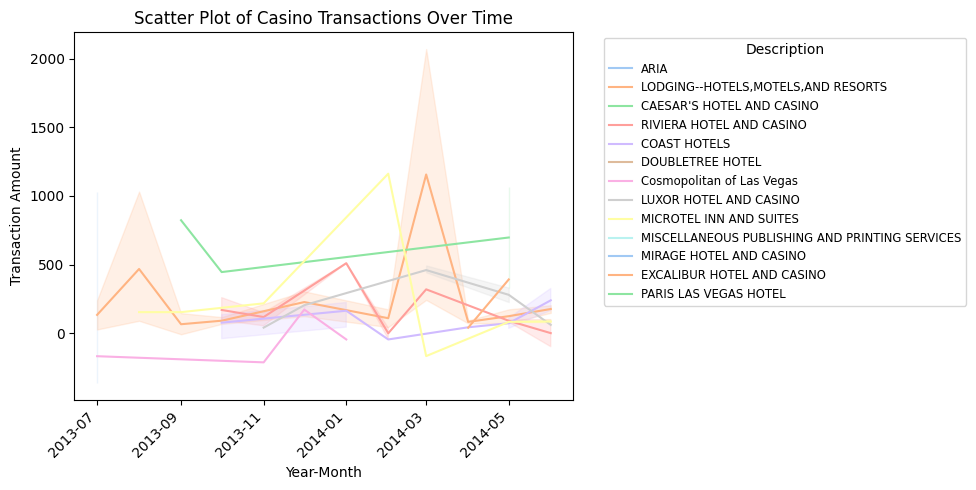

In [87]:
# Make a scatter plot that shows how much money was spent at each casino each year

plt.figure(figsize=(10, 5))
sns.lineplot(data=casinos_filtered, x='year_month', y='amount', hue='mcc', palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.title('Scatter Plot of Casino Transactions Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Amount')
plt.legend(title='Description', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

## **Section 3: Feature Engineering**

### Objective:


*   Create useful features that can consistently identify anomalies
*   Compare different variables on the individual level (cardholders) so that anomalies are more easily spotted



### 3.1

We can calculate how much money a cardholder spends on average in a given month, and see if they spent more money than usual.

### 3.1.1: Feature 1

Find any unusually high spending in the previous dataset and flag them as potential fraud.

In [88]:
# track how much each cardholder spends each month on average, and determine any outliers in spending

cardholder_monthly_spending = df.groupby(['cardholder_last_name', 'year_month'])['amount'].sum().reset_index()
cardholder_monthly_spending.sort_values(by=['cardholder_last_name', 'year_month'], ascending=False).head()

cardholder_monthly_stats = cardholder_monthly_spending.groupby('cardholder_last_name')['amount'].agg(
    mean_amount='mean',
    std_amount='std',
    q25_amount=lambda x: x.quantile(0.25),
    q50_amount=lambda x: x.quantile(0.50),
    q75_amount=lambda x: x.quantile(0.75)
).reset_index()

display(cardholder_monthly_stats.head())

,cardholder_last_name,mean_amount,std_amount,q25_amount,q50_amount,q75_amount
0,15000,4626.460000,NaN,4626.4600,4626.460,4626.4600
1,24100,464.015000,723.868386,2.2125,128.290,624.2825
2,42000,214.397000,153.707666,63.8950,261.755,316.8050
3,44600,111.990000,NaN,111.9900,111.990,111.9900
4,48000,179.724286,122.535642,128.2650,250.000,250.6050


In [89]:
# Merge monthly spending data with calculated statistics
df_monthly_merged = pd.merge(cardholder_monthly_spending, cardholder_monthly_stats, on='cardholder_last_name', how='left')

# Handle cases where std_amount is 0 or NaN to avoid division by zero
# Replace 0 with NaN, then fill all NaNs (original and replaced 0s) with 1 for calculation safety
df_monthly_merged['std_amount_cleaned'] = df_monthly_merged['std_amount'].replace(0, np.nan).fillna(1)

# Calculate the z-score for each monthly spending amount
df_monthly_merged['z_score'] = (df_monthly_merged['amount'] - df_monthly_merged['mean_amount']) / df_monthly_merged['std_amount_cleaned']

# For cardholders with only one monthly transaction (std_amount was NaN or 0), set z_score to 0
df_monthly_merged.loc[df_monthly_merged['std_amount'].isna() | (df_monthly_merged['std_amount'] == 0), 'z_score'] = 0

# Identify outliers with Z-score threshold
df_monthly_merged['is_outlier'] = np.abs(df_monthly_merged['z_score']) > 3

# Display the DataFrame with z-scores
display(df_monthly_merged.head())

,cardholder_last_name,year_month,amount,mean_amount,std_amount,q25_amount,q50_amount,q75_amount,std_amount_cleaned,z_score,is_outlier
0,15000,2014-04-01,4626.46,4626.460,NaN,4626.4600,4626.46,4626.4600,1.000000,0.000000,False
1,24100,2013-07-01,1812.99,464.015,723.868386,2.2125,128.29,624.2825,723.868386,1.863564,False
2,24100,2013-08-01,749.03,464.015,723.868386,2.2125,128.29,624.2825,723.868386,0.393739,False
3,24100,2013-09-01,6.54,464.015,723.868386,2.2125,128.29,624.2825,723.868386,-0.631986,False
4,24100,2013-12-01,250.04,464.015,723.868386,2.2125,128.29,624.2825,723.868386,-0.295599,False


### 3.1.2: Feature 2

Graph the (high) outliers and label their mcc and vendor.

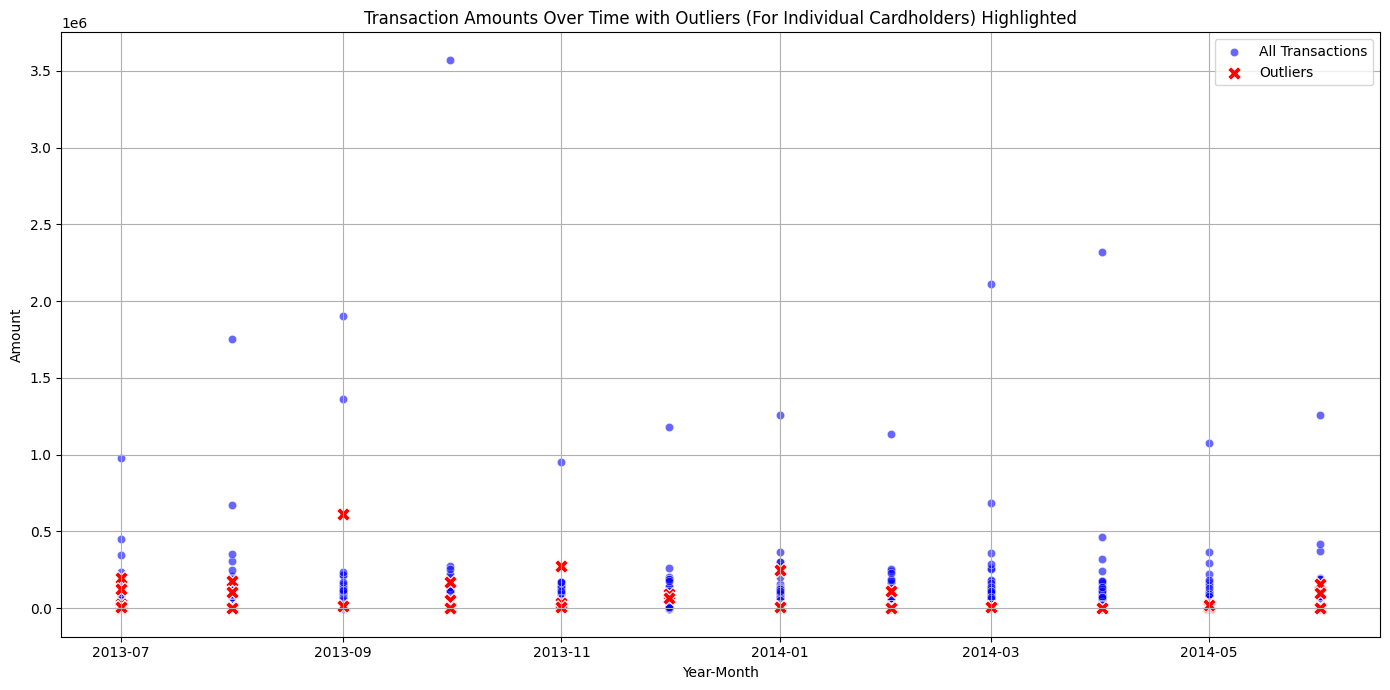

In [90]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_monthly_merged, x='year_month', y='amount', alpha=0.6, label='All Transactions', color='blue')

spending_outliers = df_monthly_merged[(df_monthly_merged['is_outlier'])]
sns.scatterplot(data=high_outliers, x='year_month', y='amount', color='red', label='Outliers', marker='X', s=100)

plt.title('Transaction Amounts Over Time with Outliers (For Individual Cardholders) Highlighted')
plt.xlabel('Year-Month')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [91]:
outliers_df = df_monthly_merged[df_monthly_merged['is_outlier']].copy()

# Get unique cardholder and month combinations for outliers
outlier_months_info = outliers_df[['cardholder_last_name', 'year_month']].drop_duplicates()

# Merge this info back to the original df to get individual transactions for these outlier months
df_outlier_transactions = pd.merge(df, outlier_months_info, on=['cardholder_last_name', 'year_month'], how='inner')

# Group these transactions by cardholder and month, and collect all unique MCCs
mcc_per_outlier_month = df_outlier_transactions.groupby(['cardholder_last_name', 'year_month'])['mcc'].apply(lambda x: list(x.unique())).reset_index(name='mccs_in_outlier_month')
vendors_per_outlier_month = df_outlier_transactions.groupby(['cardholder_last_name', 'year_month'])['vendor'].apply(lambda x: list(x.unique())).reset_index(name='vendors_in_outlier_month')

# Merge this MCC information back into the outliers_df
outliers_df = pd.merge(outliers_df, mcc_per_outlier_month, on=['cardholder_last_name', 'year_month'], how='left')
outliers_df = pd.merge(outliers_df, vendors_per_outlier_month, on=['cardholder_last_name', 'year_month'], how='left')

outliers_df.sort_values(by=['cardholder_last_name', 'year_month'], ascending=False).head()

,cardholder_last_name,year_month,amount,mean_amount,std_amount,q25_amount,q50_amount,q75_amount,std_amount_cleaned,z_score,is_outlier,mccs_in_outlier_month,vendors_in_outlier_month
54,Wentroth,2014-06-01,1858.53,378.575000,485.837339,107.3675,257.780,361.1000,485.837339,3.046194,True,"[SPORTING GOODS STORES, BOAT DEALERS, HARDWARE...","[BASS PRO SHOPS, ZALOUDEK IMPLEMENT CO, BRANDT..."
53,Wassell,2014-01-01,4505.71,734.999167,1205.163119,264.3075,358.600,651.2675,1205.163119,3.128797,True,"[BOOK STORES, BUSINESS SERVICES NOT ELSEWHERE ...","[Amazon.com, AMAZON MKTPLACE PMTS, WEBEX WEB..."
52,Warr,2013-10-01,3320.43,686.917500,868.365667,224.2500,493.585,614.2575,868.365667,3.032723,True,"[BOOK STORES, OFFICE, PHOTOGRAPHIC, PHOTOCOPY,...","[AMAZON MKTPLACE PMTS, COPELINS OFFICE CENTER ..."
51,Ward,2013-12-01,63430.65,13465.213333,16468.169253,5394.5175,10142.070,12831.9850,16468.169253,3.034061,True,"[TELECOMMUNICATION SERVICES, ARTIST SUPPLY AND...","[AT&T DATA, MICHAELS STORES 1674, SQ CINDI TA..."
50,WICKHAM,2013-10-01,2597.24,1752.545000,281.434964,1613.9725,1624.530,1744.7300,281.434964,3.001386,True,"[MISCELLANEOUS AND SPECIALTY RETAIL STORES, BO...","[LUMINATOR HOLDING, AMAZON MKTPLACE PMTS, VZWR..."


I included both high and low outliers because while there are definitely cases of fraud where an unusually large amount of money is spent on the card, there are also cases where the fraudulent spending was made in small increments so as not to alert the credit card company's security system, and this kind of small spending may be unusually low for the actual card owner.

### 3.2
Going off from Section 2.2.1, we can create a table both describing the distribution of spending for each cardholder and showing whether or not the cardholder spent an unusually large amount of money at a single-occurance vendor.

### 3.2.1: Feature 3
Create a DataFrame listing the total amount of money each cardholder spends at any vendor and how many transactions occured at each.

In [92]:
cardholder_summary = df.groupby('cardholder_last_name').agg(
    total_spending=('amount', 'sum'),
    transaction_count=('amount', 'count')
).reset_index()

cardholder_summary = cardholder_summary.sort_values(by='total_spending', ascending=False)
display(cardholder_summary.head())

,cardholder_last_name,total_spending,transaction_count
665,Cardholder,17856325.63,1629
9,77000,3654238.35,6
3223,Saltzman,3247228.73,880
1818,JOURNEY HOUSE TRAVEL INC,2930392.23,10137
3591,UNIVERSITY AMERICAN,2461081.62,7219


### 3.2.2: Feature 4
Finding the mean, standard deviation, and quartiles for each cardholder's transaction spending to estimate their overall spending habits.

In [93]:
# Compute the mean, standard deviation, first quartile, median, and third quartile for each cardholder's transaction spending

cardholder_transaction_stats = df.groupby('cardholder_last_name')['amount'].agg(
    mean_amount='mean',
    std_amount='std',
    q25_amount=lambda x: x.quantile(0.25),
    q50_amount=lambda x: x.quantile(0.50),
    q75_amount=lambda x: x.quantile(0.75)
).reset_index()

display(cardholder_transaction_stats.head())

,cardholder_last_name,mean_amount,std_amount,q25_amount,q50_amount,q75_amount
0,15000,4626.460000,NaN,4626.4600,4626.460,4626.460
1,24100,278.409000,582.580400,0.2225,10.535,191.725
2,42000,133.998125,158.922422,1.5750,2.390,277.825
3,44600,111.990000,NaN,111.9900,111.990,111.990
4,48000,96.774615,162.240903,0.4600,6.530,250.000


### 3.2.3: Feature 5
Finding the spending outliers for each cardholder to flag any potential anomalies.

In [94]:
# Find outliers by merging back into the original DataFrame and computing the z-score

df_merged_stats = pd.merge(df, cardholder_transaction_stats, on='cardholder_last_name', how='left')
print("Merged DataFrame created.")

Merged DataFrame created.


In [95]:
z_score_threshold = 3

# Handle cases where std_amount is 0 or NaN to avoid division by zero
# For such cases, the Z-score is set to 0 as there's no variation or only one transaction.
df_merged_stats['std_amount_cleaned'] = df_merged_stats['std_amount'].replace(0, np.nan).fillna(1) # Replace 0 with NaN, then fill all NaNs (original and replaced 0s) with 1 for calculation safety

df_merged_stats['z_score'] = (df_merged_stats['amount'] - df_merged_stats['mean_amount']) / df_merged_stats['std_amount_cleaned']

# For cardholders with only one transaction (std_amount was NaN), the z_score will be NaN because std_amount_cleaned was filled with 1, but the numerator (amount - mean_amount) is 0.
# Let's directly set z_score to 0 where std_amount was originally 0 or NaN for conceptual clarity.
df_merged_stats.loc[df_merged_stats['std_amount'].isna() | (df_merged_stats['std_amount'] == 0), 'z_score'] = 0


# Identify outliers based on the Z-score threshold
df_merged_stats['is_outlier'] = np.abs(df_merged_stats['z_score']) > z_score_threshold

print(f"Number of identified outliers: {df_merged_stats['is_outlier'].sum()}")
display(df_merged_stats.head())

Number of identified outliers: 9852


,year_month,agency_number,agency_name,cardholder_last_name,cardholder_first_initial,description,amount,vendor,transaction_date,posted_date,mcc,mean_amount,std_amount,q25_amount,q50_amount,q75_amount,std_amount_cleaned,z_score,is_outlier
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,241.411528,367.939789,24.44,126.87,438.600,367.939789,1.762757,False
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,241.411528,367.939789,24.44,126.87,438.600,367.939789,0.346656,False
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,391.501753,640.933474,35.92,149.87,511.900,640.933474,-0.352114,False
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",391.501753,640.933474,35.92,149.87,511.900,640.933474,-0.460441,False
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",93.818028,144.907921,10.81,36.98,81.445,144.907921,0.221810,False


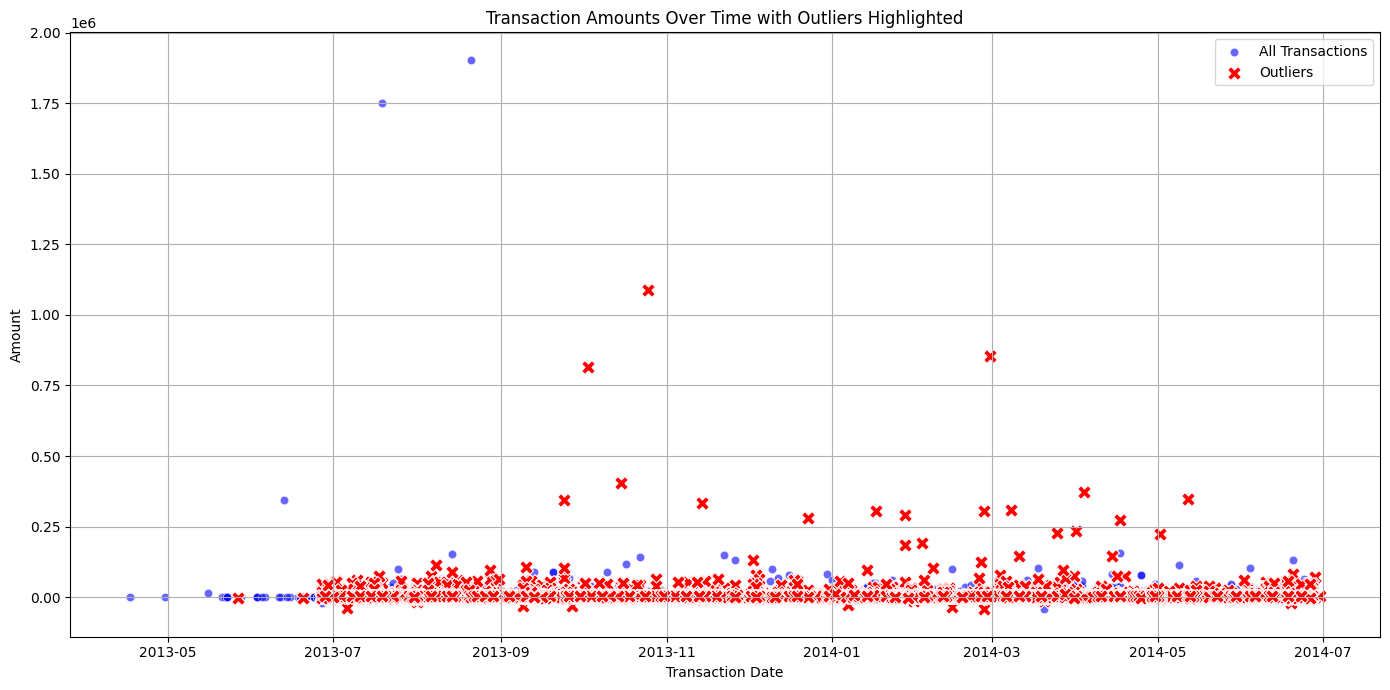

In [96]:
# Create a scatter plot visualizing the outliers

plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_merged_stats, x='transaction_date', y='amount', alpha=0.6, label='All Transactions', color='blue')

# Filter for outliers that are above the 75th percentile
outliers = df_merged_stats[df_merged_stats['is_outlier']]
sns.scatterplot(data=outliers, x='transaction_date', y='amount', color='red', label='Outliers', marker='X', s=100)

plt.title('Transaction Amounts Over Time with Outliers Highlighted')
plt.xlabel('Transaction Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

As with Section 3.1.2, I included both high and low outliers because fraudulent transaction may be made in smaller-than-usual increments for the card owner so as not to alert the security system.

The cardholder identified as "Cardholder" recorded the highest total spending of \$17,856,325.63 across 1629 transactions. "JOURNEY HOUSE TRAVEL INC" processed the most transactions with 10137, totaling \$2,930,392.23.
For each cardholder, the mean, standard deviation, and quartiles (25th, 50th, and 75th percentiles) of transaction amounts were calculated to understand their spending patterns.
Special handling was applied for cardholders with zero or NaN standard deviation (e.g., single transactions) by setting their Z-score to 0.

*   Further investigate the characteristics of the identified 9852 outlier transactions (e.g., merchant categories, time of day, location) to discern potential patterns indicative of fraudulent activity or legitimate but unusual spending.
*   Consider implementing additional or more sophisticated fraud detection techniques, such as IQR-based methods, isolation forests, or anomaly detection algorithms, and combine them with the Z-score method for a more robust fraud detection system.


### 3.3

We can also analyze which vendors a cardholder usually spends at and whether or not the cardholder spent at a new vendor in a given month. We can show each cardholder's most frequented vendors, as well as their number of transactions and transaction amounts at a completely new vendor (if they started purchasing from a completely new vendor).

### 3.3.1: Feature 6

In [97]:
# Create a table showing the most frequented vendors by each cardholder

cardholder_vendors = df.groupby(['cardholder_last_name', 'vendor']).size().reset_index(name='count')
cardholder_vendors.sort_values(by='count', ascending=False).head()

,cardholder_last_name,vendor,count
37263,Devine,MCKESSON MEDICAL SUPPLY,1002
11817,Batenhorst,AMAZON MKTPLACE PMTS,958
125030,SAUSINS,DMI DELL HIGHER EDUC,724
15183,Bowers,LOWES #00241,577
90003,Lemmings,STAPLES,524


In [98]:
# Initialize a dictionary to store seen vendors for each cardholder
cardholder_seen_vendors = {}

# Prepare an empty list to store results for new vendors
new_vendor_transactions = []

# Sort the DataFrame by cardholder_last_name and year_month to process transactions chronologically
df_sorted = df.sort_values(by=['cardholder_last_name', 'year_month'])

for (cardholder, year_month), group in df_sorted.groupby(['cardholder_last_name', 'year_month']):
    if cardholder not in cardholder_seen_vendors:
        cardholder_seen_vendors[cardholder] = set()

    current_month_vendors = set(group['vendor'].unique())

    # Identify new vendors for the current month
    new_vendors_this_month = current_month_vendors - cardholder_seen_vendors[cardholder]

    if new_vendors_this_month:
        # Filter transactions for these new vendors
        new_vendor_group = group[group['vendor'].isin(new_vendors_this_month)]

        # Sum the amount spent at new vendors for this cardholder in this month
        total_amount_new_vendors = new_vendor_group['amount'].sum()
        num_new_vendors = len(new_vendors_this_month)

        # Flag individual transactions that involve a new vendor
        for index, row in new_vendor_group.iterrows():
            new_vendor_transactions.append({
                'cardholder_last_name': cardholder,
                'year_month': year_month,
                'vendor': row['vendor'],
                'amount': row['amount'],
                'is_new_vendor_transaction': True
            })

    # Update the set of seen vendors for the cardholder
    cardholder_seen_vendors[cardholder].update(current_month_vendors)

# Create a DataFrame from the collected new vendor transactions
df_new_vendor_transactions = pd.DataFrame(new_vendor_transactions)

display(df_new_vendor_transactions.head())

,cardholder_last_name,year_month,vendor,amount,is_new_vendor_transaction
0,15000,2014-04-01,PAYMENT ADJUSTMENT,4626.46,True
1,24100,2013-07-01,PURCHASE FINANCE CHARGE,16.90,True
2,24100,2013-07-01,LATE PAYMENT FEE,1796.09,True
3,24100,2014-03-01,CREDIT PURCHASE FINANCE C,-35.29,True
4,42000,2013-07-01,PURCHASE FINANCE CHARGE,1.17,True


### 3.3.2: Feature 7

Show how many times a cardholder spent at a new vendor and how much they spent.

In [99]:
# Create a table showing the number of times a cardholder spends at each new vendor and the amount of money spent

new_vendor_summary = df_new_vendor_transactions.groupby(['cardholder_last_name', 'vendor']).agg(
    total_spending=('amount', 'sum'),
    transaction_count=('amount', 'count')
).reset_index()

new_vendor_summary.head()

,cardholder_last_name,vendor,total_spending,transaction_count
0,15000,PAYMENT ADJUSTMENT,4626.46,1
1,24100,CREDIT PURCHASE FINANCE C,-35.29,1
2,24100,LATE PAYMENT FEE,1796.09,1
3,24100,PURCHASE FINANCE CHARGE,16.90,1
4,42000,LATE PAYMENT FEE,350.21,1
